# 项目：TMDB电影数据集探索

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

  TMDB电影数据集是一个包含：电影预算、票房收入、演职员列表、导演、概览、关键词、评分等项目的数据集，本次项目的研究旨在通过分析整理TMDB数据集信息，回答三个研究问题：  
  1.2015年各种类型电影票房收入如何？  
  2.近10年的历年电影数据中，频繁出现的关键词是什么，怎样分布？  
  3.各位导演的电影作品评分状况如何，作品评分前5名导演是谁？  
  本次项目的研究主要分为数据整理、数据分析和得出结论三个部分。

In [1]:
#启动数据包
from matplotlib import cm
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

#设置风格、尺度
sb.set_style('whitegrid')
sb.set_context('paper')

#不发出警告
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## 数据整理

### 基本特征观测

In [2]:
# 读取数据集
df = pd.read_csv("tmdb-movies.csv")

# 罗列数据集前10行
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#获取数据框基本信息,观察是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#观测数据集数值特征
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### 根据以上的特征观测可得：  
1.电影数据集有21列，10866行数据；  
2.其中imdb_id、cast、homepage、director、tagline、keywords、overview、genres、production_companies列存在缺失值；

### 丢弃无关列、空值、重复值、异常值

In [5]:
#观测数据集各列控制的数量
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### homepage列具有较多量的缺失值，且与我们的目标分析问题无关联性，这里将homepage列做删除处理。

In [6]:
#丢弃空值最多列“homepage”
df.drop("homepage",axis = 1, inplace = True)

#删除重复值
df = df.drop_duplicates()

#对数据集进行删除空值处理
df = df.dropna()

#最后观测数据集各列控制的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 10865
Data columns (total 20 columns):
id                      7030 non-null int64
imdb_id                 7030 non-null object
popularity              7030 non-null float64
budget                  7030 non-null int64
revenue                 7030 non-null int64
original_title          7030 non-null object
cast                    7030 non-null object
director                7030 non-null object
tagline                 7030 non-null object
keywords                7030 non-null object
overview                7030 non-null object
runtime                 7030 non-null int64
genres                  7030 non-null object
production_companies    7030 non-null object
release_date            7030 non-null object
vote_count              7030 non-null int64
vote_average            7030 non-null float64
release_year            7030 non-null int64
budget_adj              7030 non-null float64
revenue_adj             7030 non-null fl

#### 综上，我们已经完成数据集的整理，已丢弃无关列，重复行及控制行。  
#### 数据集被整理为7030行，20列的整齐数据集。

##### <a id='eda'></a>
## 探索性数据分析

### 研究问题 1（2015年各种类型电影票房收入如何？）

In [7]:
#筛选出发行年份威2015年的电影数据
df_2015 = df[df["release_year"] == 2015]

#查看筛选出的数据df_2015
df_2015.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#将电影类型列“genres”内的各种类型分割
genres = df_2015["genres"].str.split("|",expand = True).stack()

#丢弃原始电影类型列“genres”
df_2015.drop("genres",axis = 1,inplace = True)

#删除多余索引
genres.index = genres.index.droplevel(level = 1)

#将新genres转化为dataframe类型
genres = genres.to_frame(name = "genres")

#通过拼接得方式将genres加入df_2015
df_2015 = pd.merge(df_2015,genres,left_index = True,right_index =True)

#以genre为标签，对2015年的数据进行分组,并计算票房平均数
genre_2015 = df_2015.groupby(["genres"])["revenue"].mean()

Text(0,0.5,'revenue')

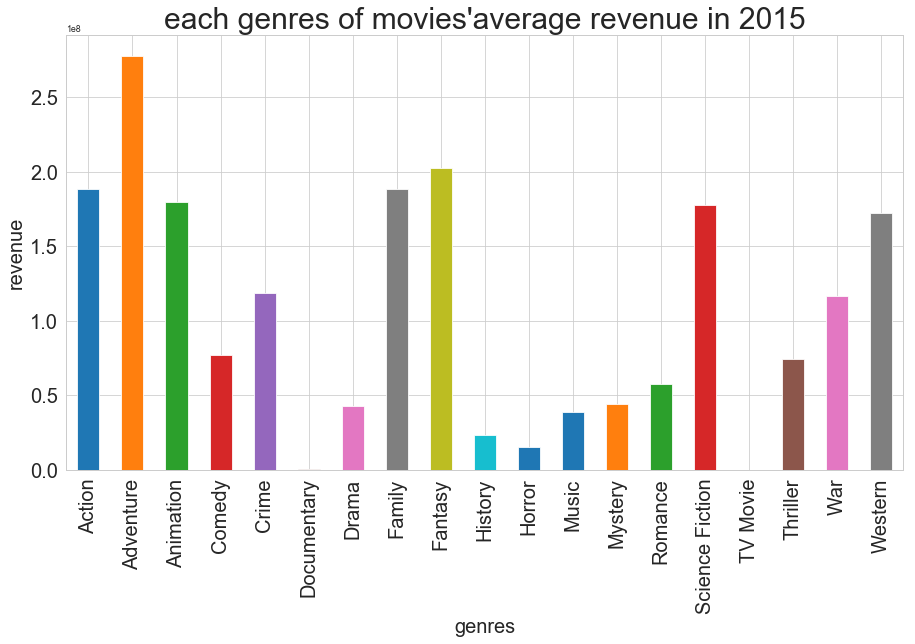

In [16]:
#做出条形图
genre_2015.plot(kind = "bar",figsize = (15,8))

#插入标题
plt.tick_params(labelsize=20)
plt.title("each genres of movies'average revenue in 2015",fontsize = 30)
plt.xlabel("genres",fontsize =20)
plt.ylabel("revenue",fontsize = 20)

#### 综上，2015年，平均票房收益最高的是adventure（冒险类）电影，紧随其后 的有动作类、奇幻类、科幻小说类、西部片类等；TV Movie（电视电影）是平均票房收益最低的电影类型，其次是纪录片。

### 研究问题 2（近10年的历年电影数据中，频繁出现的关键词是什么，怎样分布？）

In [11]:
#筛选2005-2015年的电影数据：
df_sel = df.query("release_year>= 2005")

#拆分关键词列
keywords = df_sel["keywords"].str.split("|",expand = True).stack()

#丢弃第二索引
keywords.index = keywords.index.droplevel(level=1)

#转换为dataframe
keywords = keywords.to_frame(name = "keywords")

#丢弃原keywords列
df_sel.drop("keywords",inplace = True,axis =1)

#拼接新列和原数据框
df_sel = pd.merge(df_sel,keywords,left_index = True,right_index= True)

In [12]:
df_sel

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,keywords
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,monster
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,dna
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,tyrannosaurus rex
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,velociraptor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,island
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,future
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,chase
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,post-apocalyptic
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,dystopia
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,australia


release_year
2005    [AxesSubplot(0.125,0.125;0.775x0.755)]
2006    [AxesSubplot(0.125,0.125;0.775x0.755)]
2007    [AxesSubplot(0.125,0.125;0.775x0.755)]
2008    [AxesSubplot(0.125,0.125;0.775x0.755)]
2009    [AxesSubplot(0.125,0.125;0.775x0.755)]
2010    [AxesSubplot(0.125,0.125;0.775x0.755)]
2011    [AxesSubplot(0.125,0.125;0.775x0.755)]
2012    [AxesSubplot(0.125,0.125;0.775x0.755)]
2013    [AxesSubplot(0.125,0.125;0.775x0.755)]
2014    [AxesSubplot(0.125,0.125;0.775x0.755)]
2015    [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

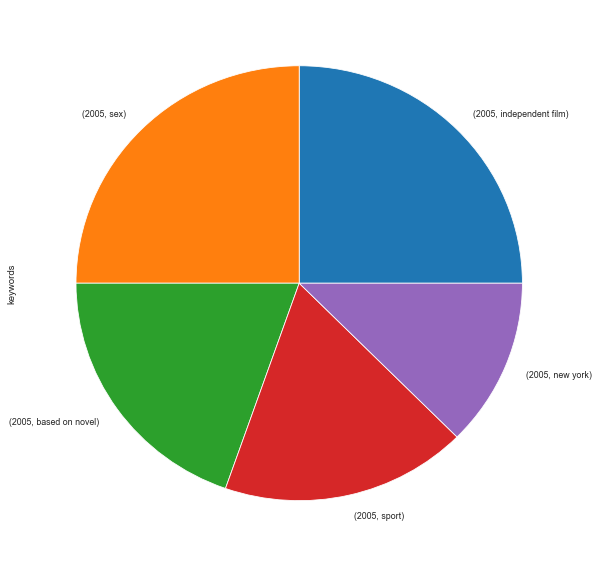

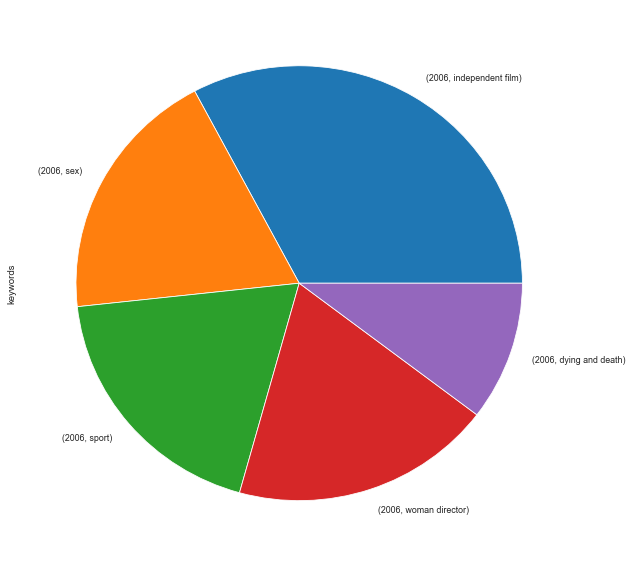

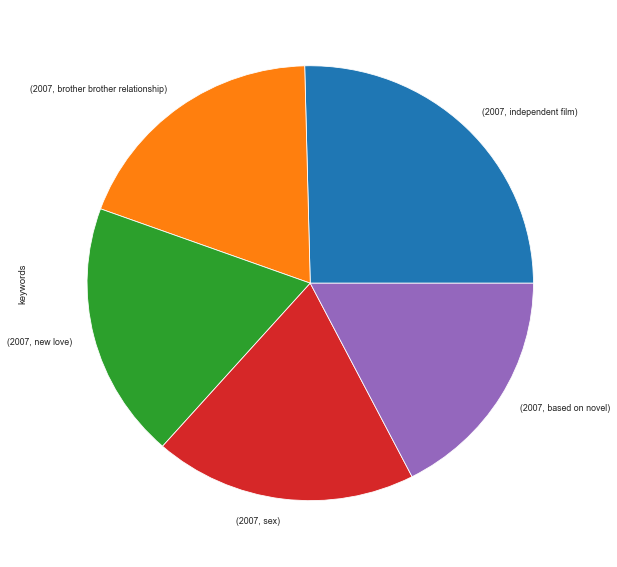

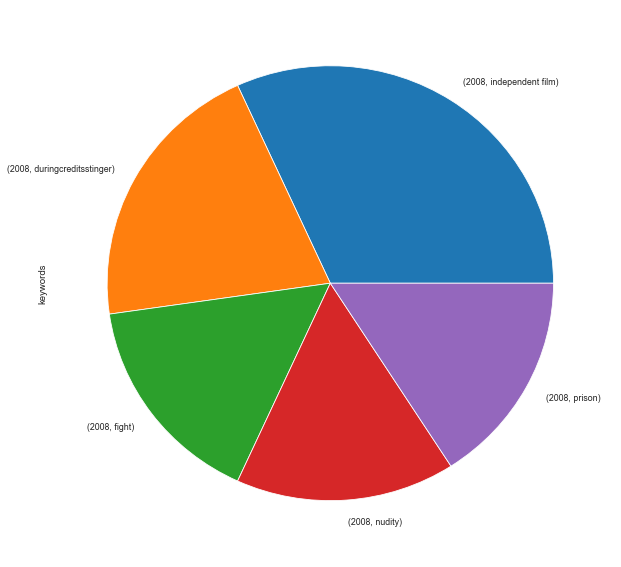

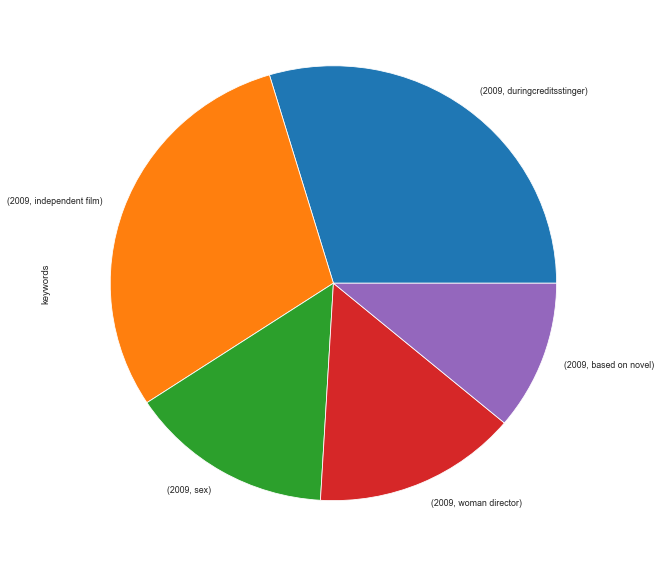

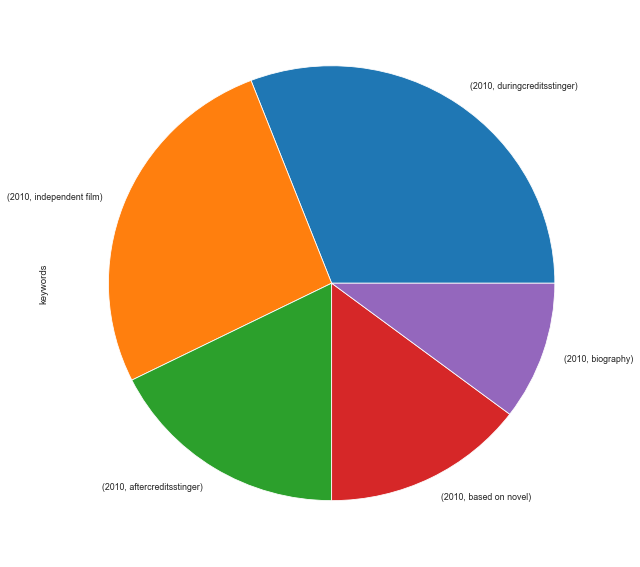

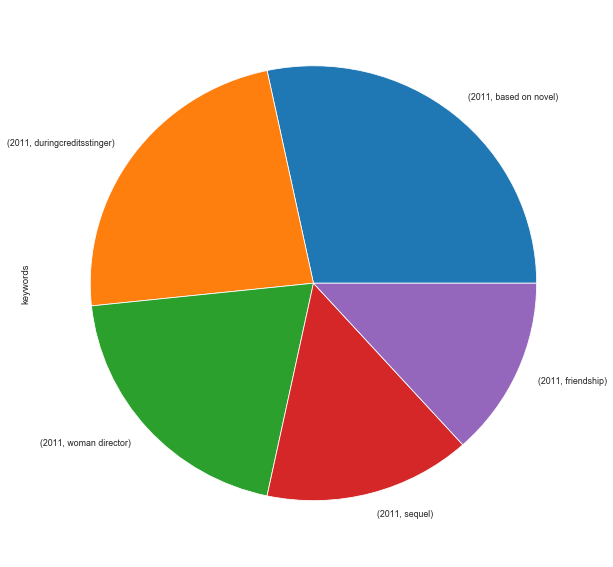

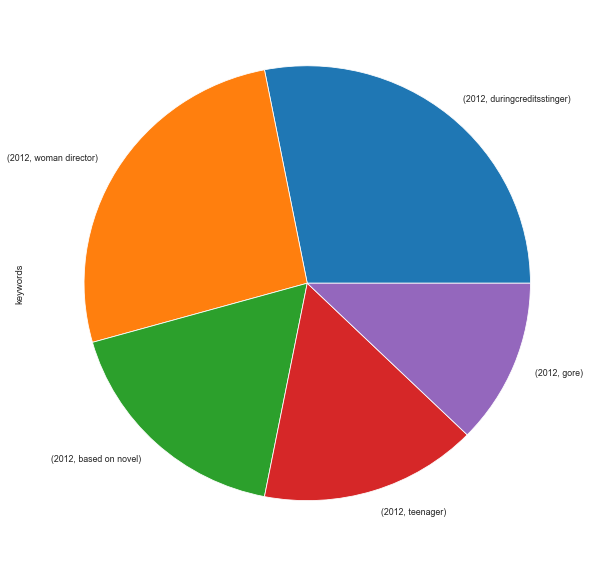

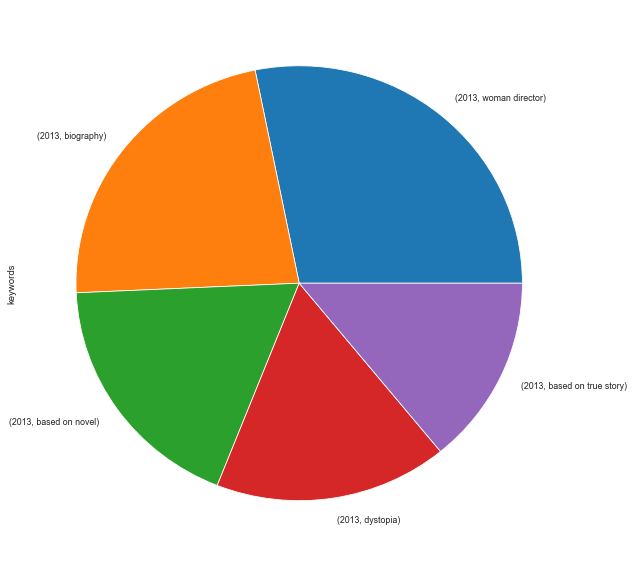

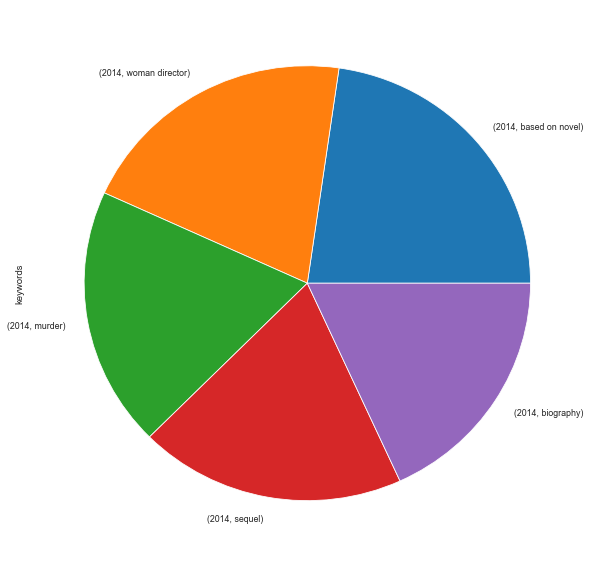

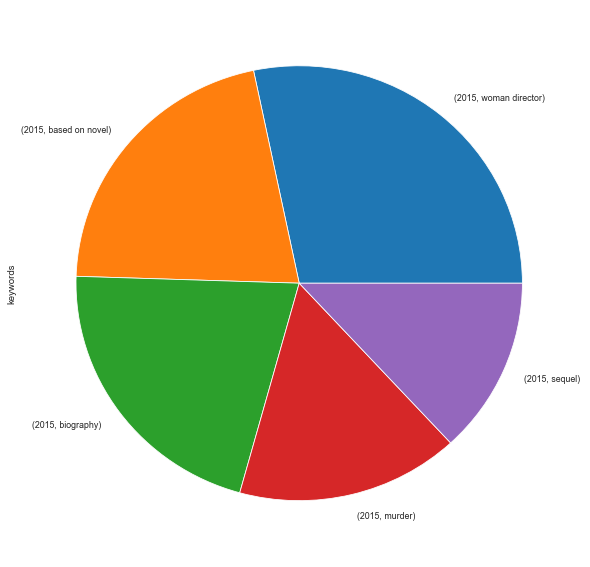

In [19]:
#根据年份对关键词出现的计数进行分组
keyword_each = df_sel.groupby("release_year")["keywords"].value_counts()

#取每个年份的出现频率的前五个关键词
keyword_each = keyword_each.groupby("release_year").head(5).to_frame()

#形成分组饼图
keyword_each.groupby("release_year").plot(kind = "pie",subplots=True,figsize = (10,10),legend = False)

#### 综上，从2005年到2015年的高频关键词图像观测：  
#### 1.独立电影和女性导演为两个高频出现的关键词，其中女性导演在2010年以后出现的频率有所上升；  
#### 2.性和运动两种题材逐渐被自传和小说改编两种题材取代；  、
#### 3.谋杀和续集拍摄也是较为热门的题材。

### 研究问题3（各位导演的电影作品评分状况如何，作品评分前5名导演是谁？）

In [14]:
#根据导演进行评分平均数分组汇总
director = df.groupby("director")["vote_average"].mean().sort_values(ascending = False).to_frame()

#取出前十名
director.head(5)

,vote_average
director,
Damien Chazelle,8.2
Al Reinert,8.2
Frank Pavich,8.1
Richard Press,8.1
Doug Sweetland,8.0


#### 综上，作品平均评分前5名的导演分别是：  
Damien Chazelle	8.2  
Al Reinert	8.2  
Frank Pavich	8.1  
Richard Press	8.1  
Doug Sweetland	8.0  

<a id='conclusions'></a>
## 结论
1.2015年，平均票房收益最高的是adventure（冒险类）电影，紧随其后 的有动作类、奇幻类、科幻小说类、西部片类等；TV Movie（电视电影）是平均票房收益最低的电影类型，其次是纪录片。  
2.独立电影和女性导演为两个高频出现的关键词，其中女性导演在2010年以后出现的频率有所上升；性和运动两种题材逐渐被自传和小说改编两种题材取代；谋杀和续集拍摄也是较为热门的题材。  
3.作品平均评分前5名的导演分别是：  
Damien Chazelle	8.2  
Al Reinert	8.2  
Frank Pavich	8.1  
Richard Press	8.1  
Doug Sweetland	8.0  
结论说明：  
1.在删除数据异常值部分，虽然数据存在一些异常值（如"revenue""runtime""budget"等列存在等于0的异常值），但如做全部删除处理后，剩余的有效数据量较少，将严重影响分析结果。这里未做异常值的删除处理，也造成了一定局限性。 
2.本次数据得出的平均票房收益和电影类型的关联性并不代表二者具有一定的因果性。